In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


world_bank_data = pd.read_csv("../data/processed/world_bank.csv")
print(world_bank_data[['control_of_corruption_estimate', 'control_of_corruption_std',
                       'gini_index', 'political_stability_estimate',
                       'rule_of_law_estimate']].describe())

       control_of_corruption_estimate  control_of_corruption_std  gini_index  \
count                      684.000000                 684.000000  595.000000   
mean                         0.799324                   0.150260   32.186387   
std                          0.976446                   0.021297    4.270748   
min                         -1.176262                   0.114062   23.700000   
25%                         -0.045192                   0.134505   28.600000   
50%                          0.746809                   0.146737   32.400000   
75%                          1.736804                   0.164188   35.200000   
max                          2.459118                   0.249614   42.800000   

       political_stability_estimate  rule_of_law_estimate  
count                    680.000000            684.000000  
mean                       0.480134              0.846237  
std                        0.682647              0.861167  
min                       -2.020833    

In [2]:
print(world_bank_data.isnull().sum())

country                                    0
date                                       0
agricultural_land%                       111
forest_land%                             111
avg_precipitation                        178
trade_in_services%                        61
control_of_corruption_estimate            54
control_of_corruption_std                 54
access_to_electricity%                   109
renewvable_energy_consumption%           146
CO2_emisions                             146
population_density                       111
inflation_annual%                         56
research_and_development_expenditure%    151
central_goverment_debt%                  406
expense%                                 138
goverment_effectiveness_estimate          55
individuals_using_internet%               77
military_expenditure%                     75
political_stability_estimate              58
rule_of_law_estimate                      54
regulatory_quality_estimate               56
government

In [3]:
numeric_columns = world_bank_data.drop(columns=['country', 'date'])
correlation_matrix = numeric_columns.corr()
# Sorting
sorted_correlation = correlation_matrix['control_of_corruption_estimate'].sort_values(ascending=False)
print(sorted_correlation)

control_of_corruption_estimate           1.000000
rule_of_law_estimate                     0.965431
goverment_effectiveness_estimate         0.962257
regulatory_quality_estimate              0.923980
voice_and_accountability_estimate        0.909015
life_expectancy_at_birth                 0.708359
political_stability_estimate             0.688979
research_and_development_expenditure%    0.656002
government_health_expenditure%           0.637443
individuals_using_internet%              0.636769
government_expenditure_on_education%     0.603916
avg_precipitation                        0.321286
access_to_electricity%                   0.297986
population_density                       0.284521
control_of_corruption_std                0.266735
trade_in_services%                       0.263662
renewvable_energy_consumption%           0.214486
central_goverment_debt%                  0.206632
expense%                                 0.051125
birth_rate                               0.048323


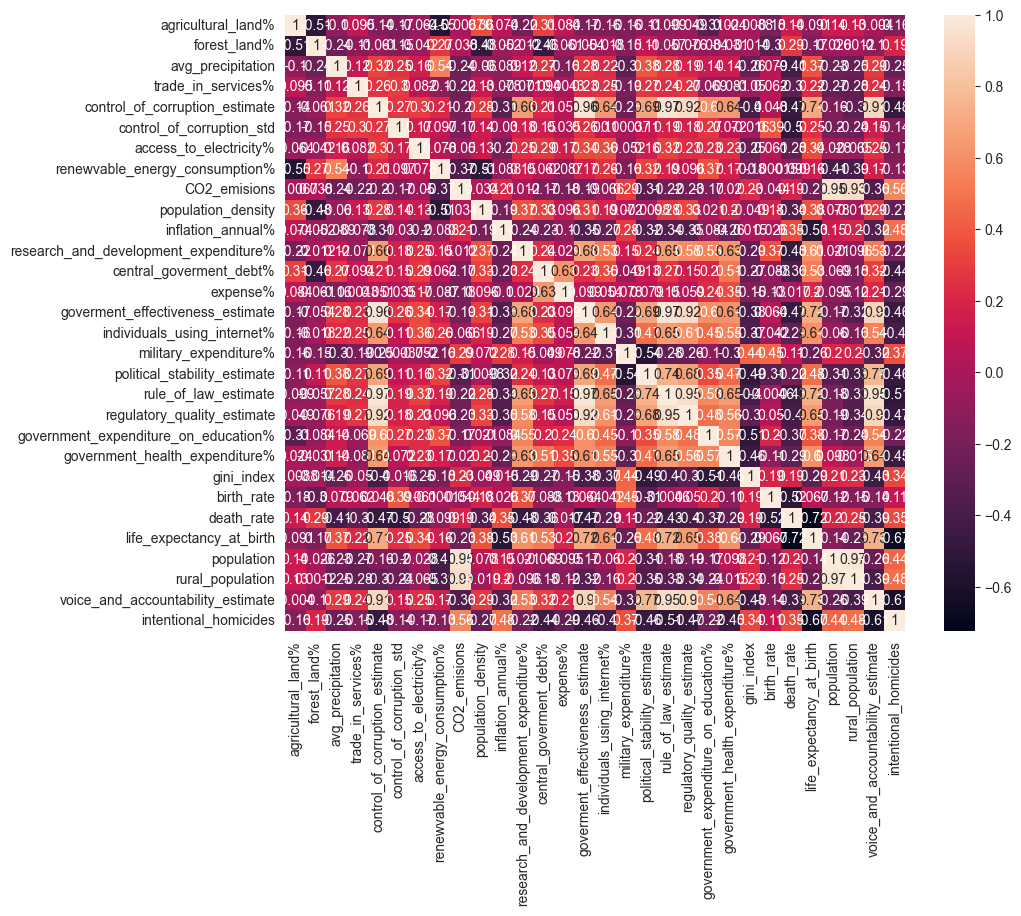

In [4]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.show()


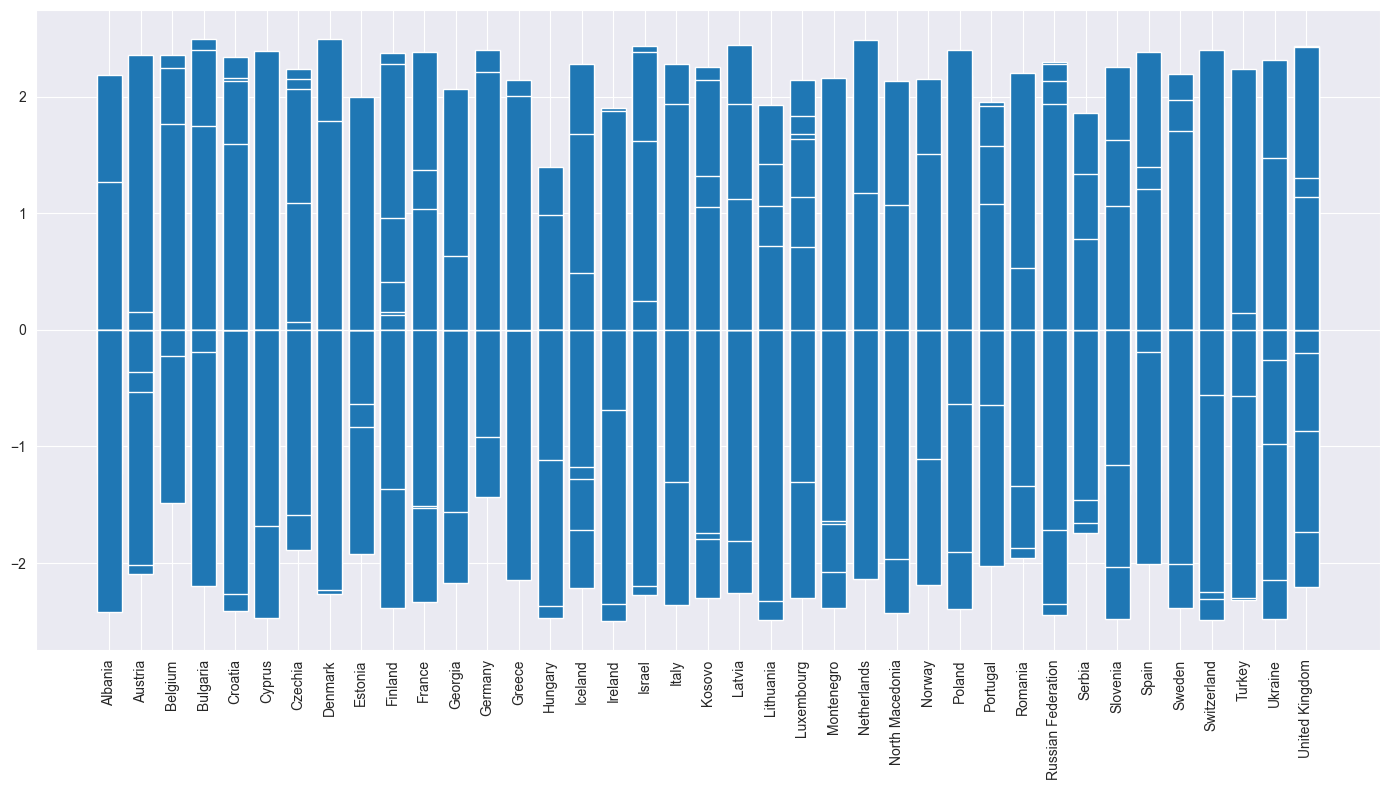

In [7]:
world_bank_data['regulatory_quality_estimate'] = np.random.uniform(-2.5, 2.5, size=len(world_bank_data))


plt.figure(figsize=(14, 8))
plt.bar(world_bank_data['country'], world_bank_data['regulatory_quality_estimate'])
plt.xticks(rotation=90,)
plt.tight_layout()
plt.show()

In [5]:
world_bank_data['date'] = pd.to_datetime(world_bank_data['date']).dt.strftime('%Y')
world_bank_data.head()



,country,date,agricultural_land%,forest_land%,avg_precipitation,trade_in_services%,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity%,renewvable_energy_consumption%,...,government_expenditure_on_education%,government_health_expenditure%,gini_index,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population,voice_and_accountability_estimate,intentional_homicides
0,Albania,2005,39.306569,28.309672,1485.0,32.905109,-0.813264,0.160477,99.371124,36.77,...,3.281550,2.665318,30.6,13.235,6.306,76.621,3011487.0,1604189.0,0.003672,5.078094
1,Albania,2006,40.875912,28.356277,1485.0,36.187926,-0.790545,0.152564,99.389366,31.62,...,3.191460,2.559311,NaN,12.539,6.477,76.816,2992547.0,1561661.0,0.075890,3.163096
2,Albania,2007,40.839416,28.402883,1485.0,37.734105,-0.706940,0.155251,99.428452,32.00,...,3.275930,2.435714,NaN,12.070,6.318,77.549,2970017.0,1517619.0,0.113008,3.528127
3,Albania,2008,43.102190,28.449489,1485.0,39.656173,-0.605212,0.144491,100.000000,35.79,...,3.509226,2.271264,30.0,11.868,6.570,77.653,2947314.0,1473922.0,0.174939,3.150738
4,Albania,2009,43.843066,28.496095,1485.0,40.601399,-0.545271,0.149075,99.554451,37.09,...,NaN,2.338068,NaN,11.841,6.810,77.781,2927519.0,1432259.0,0.141477,2.900488


In [ ]:
world_bank_data.to_csv("../data/processed/oecd_years.csv", index=False, index_label=False)